In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
n_samples = 100
np.random.seed(42)
z = np.random.normal(size=(n_samples,1))
z.shape, z[:5]

((100, 1),
 array([[ 0.49671415],
        [-0.1382643 ],
        [ 0.64768854],
        [ 1.52302986],
        [-0.23415337]]))

(array([ 1.,  0.,  2.,  2.,  1.,  5.,  5.,  3.,  5., 14., 11.,  6., 10.,
        11.,  4.,  7.,  5.,  1.,  6.,  1.]),
 array([-2.6197451 , -2.39614394, -2.17254278, -1.94894161, -1.72534045,
        -1.50173928, -1.27813812, -1.05453695, -0.83093579, -0.60733462,
        -0.38373346, -0.1601323 ,  0.06346887,  0.28707003,  0.5106712 ,
         0.73427236,  0.95787353,  1.18147469,  1.40507586,  1.62867702,
         1.85227818]),
 <BarContainer object of 20 artists>)

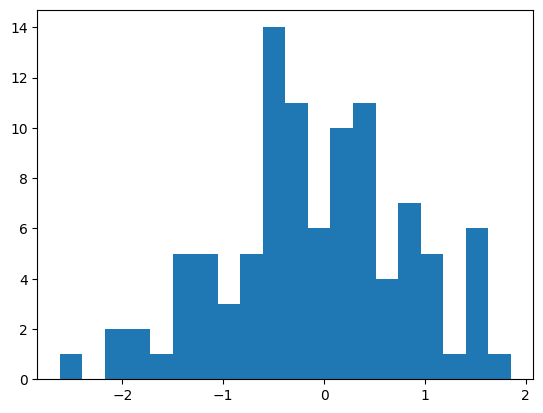

In [27]:
plt.hist(z, bins=20)

In [28]:
np.random.seed(42)
W = np.array([[5.12],[3.2]])
mu = np.array([7,1])
epsilon = np.random.normal(size=(n_samples, 2),scale=10)

W.shape, mu.shape, epsilon.shape

((2, 1), (2,), (100, 2))

In [29]:
X= z @ W.T + mu + epsilon
X.shape, X[:5]

((100, 2),
 array([[14.51031799,  1.20684228],
        [12.76897216, 15.7878528 ],
        [ 7.97463157,  0.73123375],
        [30.59004102, 13.54804283],
        [ 1.10639086,  5.67630964]]))

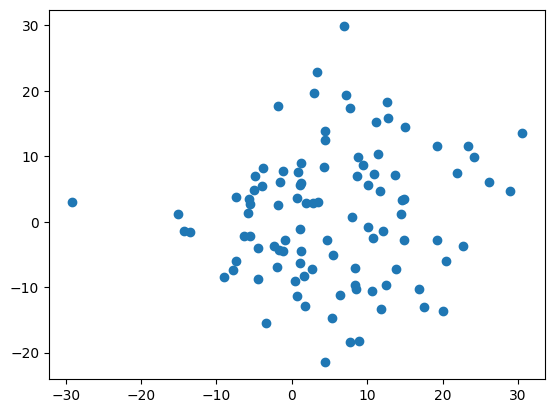

In [30]:
plt.scatter(X[:,0], X[:,1])


In [31]:
from model import PCA

pca = PCA(n_components=1)
pca.fit(X)
pca.components_.shape, pca.components_

Performing SVD...
SVD done.
Principal Directions are stored in components_


((1, 2), array([[-0.77308911, -0.63429742]]))

In [32]:
X_pca = pca.transform(X)
X_pca.shape, X_pca[:5]

Transforming X to 1 Principal Components


((100, 1),
 array([[ -7.23678617],
        [-15.13926809],
        [ -1.88244089],
        [-27.49583672],
        [  0.29067233]]))

In [33]:
X_new = X_pca @ pca.components_ + pca.mean_
X_new.shape, X_new[:5]

((100, 2),
 array([[10.90734389,  5.59818922],
        [17.01666663, 10.61071315],
        [ 6.76795784,  2.20194179],
        [26.56939531, 18.44845281],
        [ 5.08794767,  0.82354168]]))

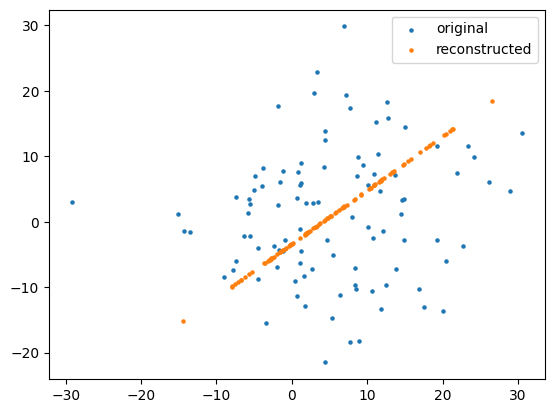

In [34]:
plt.scatter(X[:,0], X[:,1], label='original', s=5)
plt.scatter(X_new[:,0], X_new[:,1], label='reconstructed', s=5)
plt.legend()
